In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)

train_img_count = 50000
test_img_count = 10000
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def unpickle(file):
    with open(file, 'rb') as fo:
        datadict = pickle.load(fo, encoding='bytes')
        X = datadict[b'data']
        Y = datadict[b'labels']
        X = X.reshape(10000,3,img_rows, img_cols)
#         X = X.transpose(0,2,3,1)
        Y = np.array(Y)
    return X, Y

In [3]:
file_train_img = "/home/dm-lab/Documents/Dataset/cifar_10/data_batch_"
file_test_img = "/home/dm-lab/Documents/Dataset/cifar_10/test_batch"

In [4]:
#Load Training Data
train_img = []
train_lbl = []

for i in range(1,6):
    x, y = unpickle(file_train_img+str(i))
    train_img.append(x)
    train_lbl.append(y)
train_img = np.concatenate(train_img)
train_lbl = np.concatenate(train_lbl)

#Load Testing Data
test_img, test_lbl = unpickle(file_test_img)

In [5]:
np.random.seed(1)
random_train_idx = []
for i in range(10):
    idxs = list(np.where(train_lbl==i)[0])
    random_train_idx.append(np.random.choice(idxs,5,replace = False))

In [6]:
random_train_idx

[array([27777, 47651, 38321, 35373, 27460]),
 array([ 5149, 29230, 39974,  9113, 31288]),
 array([15896,  4811, 31177, 31394, 33303]),
 array([39423, 46349, 42455,  6014, 33582]),
 array([31003, 17077, 41294,  4231,  6527]),
 array([16494, 20669, 30703, 13592, 15845]),
 array([ 7575,  4130, 17287,  3861,  2998]),
 array([16138, 41479, 30852, 48258, 11483]),
 array([ 3310,  9796, 39653, 34468,  4955]),
 array([44692, 33024, 41904,  8126, 38483])]

# Visualize 5 samples from each class in the form of images


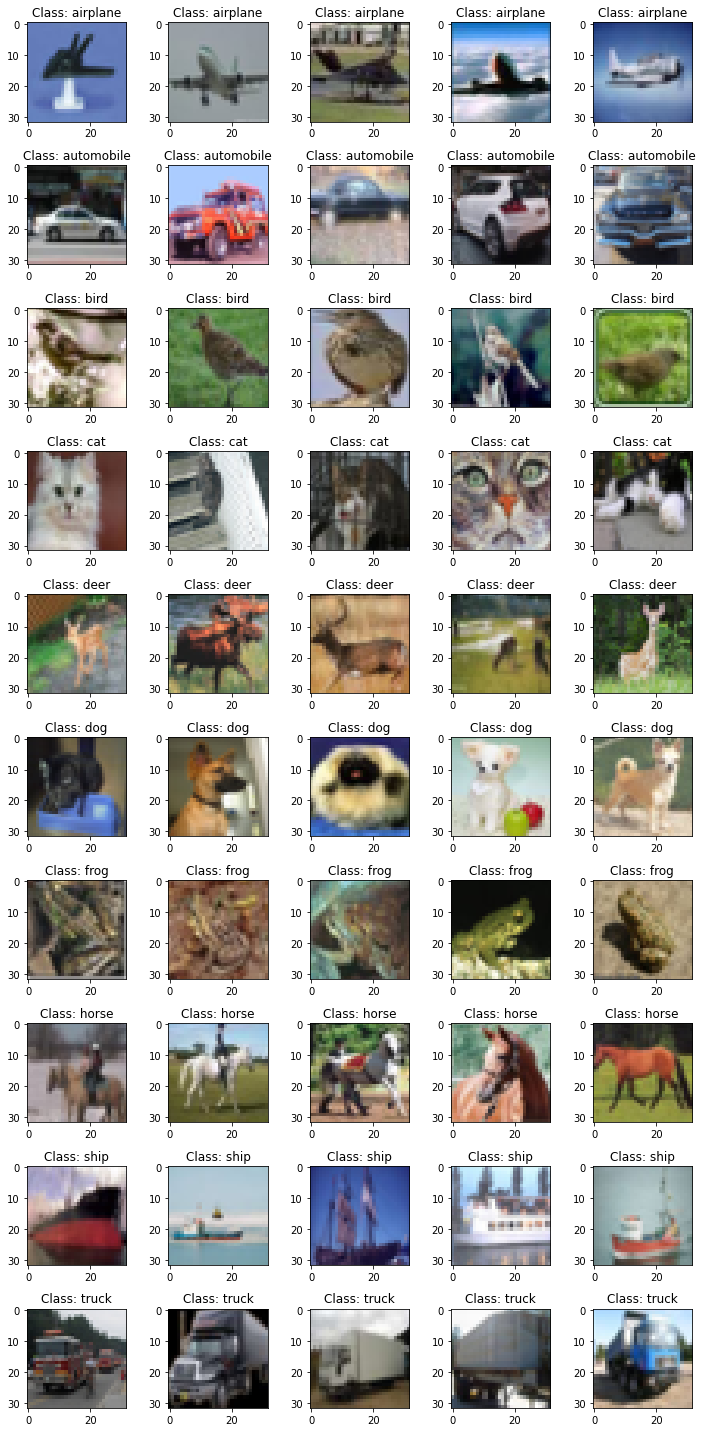

In [7]:
num_row = 10
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))

for i in range(num_row):
    for j in range(num_col):
        ax = axes[i, j]
        ax.imshow(train_img[random_train_idx[i][j]].transpose(1,2,0))
        ax.set_title('Class: {}'.format(classes[i]))
plt.tight_layout()
plt.show()

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns

In [9]:
X = train_img.reshape(50000,3*img_rows*img_cols)
Xt = test_img.reshape(10000,3*img_rows*img_cols)
y = train_lbl.flatten()
yt = test_lbl.flatten()

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
Xt = scaler.fit_transform(Xt)

# Apply LDA(use sklearn) on the given dataset

In [11]:
def lda():
    print("[LDA] feature reduction")
    lda = LDA(store_covariance=True)
    lda.fit(X, y)

    print("[LDA] training accuracy")
    X_pred = lda.predict(X)
    acc_train = metrics.accuracy_score(y, X_pred)
    
    print("[LDA] testing accuracy")
    Xt_pred = lda.predict(Xt)
    acc_test = metrics.accuracy_score(yt, Xt_pred)
    
    print("[LDA] training accuracy= %f, test accuracy= %f" % (acc_train, acc_test))
    return (X_pred,Xt_pred),(acc_train, acc_test)

# Report accuracy and class-wise accuracy for testing dataset.

In [12]:
lda_param = lda()

[LDA] feature reduction
[LDA] training accuracy
[LDA] testing accuracy
[LDA] training accuracy= 0.514660, test accuracy= 0.371200


In [13]:
cm = metrics.confusion_matrix(yt, lda_param[0][1])
cm

array([[467,  46,  48,  51,  21,  40,  20,  54, 183,  70],
       [ 66, 422,  44,  51,  35,  44,  36,  46,  75, 181],
       [105,  37, 251, 106, 133,  83, 139,  71,  47,  28],
       [ 42,  50, 119, 259,  64, 200, 131,  48,  29,  58],
       [ 60,  27, 157,  83, 269, 104, 145, 101,  24,  30],
       [ 39,  43, 108, 192,  78, 315,  88,  72,  36,  29],
       [ 15,  46, 101, 145, 124,  79, 411,  43,  13,  23],
       [ 49,  41,  86,  74,  87,  94,  45, 411,  39,  74],
       [175,  83,  23,  43,  11,  52,  12,  22, 479, 100],
       [ 74, 186,  26,  40,  29,  30,  40,  62,  85, 428]])

Text(0.5, 1.0, 'Test Accuracy Score: 0.3712')

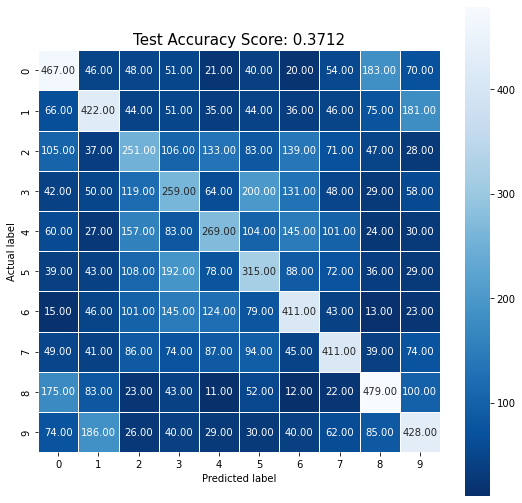

In [14]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy Score: {0}'.format(lda_param[1][1])
plt.title(all_sample_title, size = 15)

In [15]:
class_accuracy = {'class'+str(i):cm[i][i]/np.sum(cm[i][:]) for i in range(10)}
class_accuracy

{'class0': 0.467,
 'class1': 0.422,
 'class2': 0.251,
 'class3': 0.259,
 'class4': 0.269,
 'class5': 0.315,
 'class6': 0.411,
 'class7': 0.411,
 'class8': 0.479,
 'class9': 0.428}